In [1]:
#completing imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/DA Project/bank-additional-full.csv',sep=';')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
#deleting duration as the dataset description reccommended
del df['duration']

In [6]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [7]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [8]:
#encoding the categorical variables
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [9]:
#to normalize the dataset
df_z_scaled = df[cols_num].copy()

In [10]:
df_z_scaled

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
...,...,...,...,...,...,...,...,...,...
41183,1,999,0,-1.1,94.767,-50.8,4963.6,73,1.028
41184,1,999,0,-1.1,94.767,-50.8,4963.6,46,1.028
41185,2,999,0,-1.1,94.767,-50.8,4963.6,56,1.028
41186,1,999,0,-1.1,94.767,-50.8,4963.6,44,1.028


In [11]:
# copy the data
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451
1,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.628973,0.712451
2,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.290182,0.712451
3,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.002309,0.712451
4,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451
...,...,...,...,...,...,...,...,...,...
41183,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,3.164298,-1.495168
41184,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.573438,-1.495168
41185,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,1.533016,-1.495168
41186,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.381522,-1.495168


In [12]:
cols_all_cat=list(cols_new_cat.columns)

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
#merging categorical columns and normalized numerical columns
df = pd.concat([df_z_scaled,cols_new_cat], axis = 1)

In [15]:
df

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.628973,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.290182,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.002309,0.712451,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,3.164298,-1.495168,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.573438,-1.495168,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,1.533016,-1.495168,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.381522,-1.495168,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [16]:
df1=pd.read_csv('/content/drive/MyDrive/DA Project/bank-additional-full.csv',sep=';')

In [17]:
del df1['duration']

In [18]:
df=pd.concat([df,df1['y']], axis = 1)

In [19]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [20]:
#taking output values as a binary 1 or 0 instead of yes or no
df['y'] = (df.y == 'yes').astype('int')

In [21]:
df.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [22]:
df

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.628973,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.290182,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,-0.002309,0.712451,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.331676,1.533016,0.712451,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,3.164298,-1.495168,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
41184,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.573438,-1.495168,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41185,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,1.533016,-1.495168,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41186,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-2.815662,0.381522,-1.495168,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [23]:
#To check imbalance
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
y = df['y']
X = df.values[:, :-1]
counter = Counter(y)
print(counter)

Counter({0: 36548, 1: 4640})


In [24]:
from imblearn.under_sampling import NearMiss

In [25]:
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 4640, 1: 4640})


In [26]:
X

array([[ 1.23913022,  0.19541153,  5.7123274 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.51711209,  0.19541153,  5.7123274 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.51711209,  0.19541153,  5.7123274 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.5659151 ,  0.19541153, -0.34949004, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5659151 ,  0.19541153, -0.34949004, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5659151 ,  0.19541153, -0.34949004, ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9275    1
9276    1
9277    1
9278    1
9279    1
Name: y, Length: 9280, dtype: int64

In [28]:
#Performing train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=50)

In [29]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(50, activation='relu', input_shape=(62,)))

# Add one hidden layer 
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [30]:
#Defining recall, precision, f1 score functions to see how well the model is performing
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [32]:
model.fit(X_train,y_train,epochs = 125)

Epoch 1/125
218/218 [==============================] - 2s 2ms/step - loss: 0.3814 - acc: 0.8283 - f1_m: 0.8252 - precision_m: 0.8336 - recall_m: 0.8347
Epoch 2/125
218/218 [==============================] - 0s 2ms/step - loss: 0.3230 - acc: 0.8520 - f1_m: 0.8457 - precision_m: 0.8681 - recall_m: 0.8348
Epoch 3/125
218/218 [==============================] - 0s 2ms/step - loss: 0.3104 - acc: 0.8593 - f1_m: 0.8516 - precision_m: 0.8788 - recall_m: 0.8355
Epoch 4/125
218/218 [==============================] - 1s 2ms/step - loss: 0.3016 - acc: 0.8647 - f1_m: 0.8560 - precision_m: 0.8859 - recall_m: 0.8351
Epoch 5/125
218/218 [==============================] - 1s 2ms/step - loss: 0.2999 - acc: 0.8655 - f1_m: 0.8572 - precision_m: 0.8908 - recall_m: 0.8364
Epoch 6/125
218/218 [==============================] - 0s 2ms/step - loss: 0.2911 - acc: 0.8716 - f1_m: 0.8641 - precision_m: 0.8985 - recall_m: 0.8411
Epoch 7/125
218/218 [==============================] - 0s 2ms/step - loss: 0.2859 - acc:

In [33]:
#prediction of X_test
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [34]:
#Classifying the output of nueral netwrok with a threshold of 0.6
yhat=[]
for i in predict_x:
  if i[0]>0.60:
    yhat.append(1)
  else:
    yhat.append(0)

In [35]:
import sklearn.metrics

In [36]:
ytest=list(y_test)

In [37]:
#Final test results
sklearn.metrics.precision_recall_fscore_support(ytest,yhat,average='binary')

(0.8166089965397924, 0.814495254529767, 0.8155507559395249, None)

In [38]:
sklearn.metrics.accuracy_score(ytest,yhat)

0.815948275862069

In [39]:
# Function that plots a Lift Curve using the real label values of a dataset and the probability predictions of a Machine Learning Algorithm/model
# @Params:
# y_val: real labels of the data
# y_pred: probability predictions for such data
# step: how big we want the steps in the percentiles to be

def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.grid(True)
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

In [40]:
predict_x.shape

(2320, 1)

In [41]:
classes_x

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
ypred = [x[0] for x in predict_x]

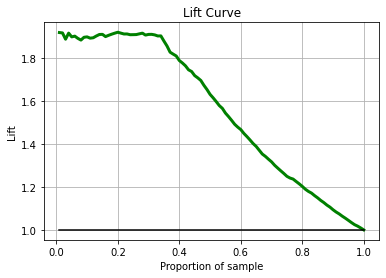

In [43]:
plot_Lift_curve(ytest,ypred)

In [44]:
Counter(ytest)

Counter({0: 1161, 1: 1159})

A-Lift analysis tells us the proportion of  the customers who would invest in a term deposit reached for a given proportion of most likely customers who would invest in a term deposit as predicted by  our model. 

Thus as per this , the telemarketing company can choose to call only a proportion of their customer base permissible by the resources at hand and still manage to reach a significant chunk of the people who will invest in a term deposit.



1.   Reaching out to 20% of the most likely customers would fetch them a whopping 39% of the possible customers subscribing to a term deposit.

2.   Reaching out to 40% of the most likely customers would fetch them about 72% of the possible customers subscribing to a term deposit.

3.   Lastly , reaching out to 50% of the most likely customers would fetch them about 80% of the possible customers subscribing to a term deposit.



In [45]:
!pip install scikit-plot
import scikitplot as skplt

In [46]:
prob=[] 
for i in predict_x :
  prob.append([1-i[0],i[0]]) #calculating the probability of a record being classified to class - 0 and class - 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


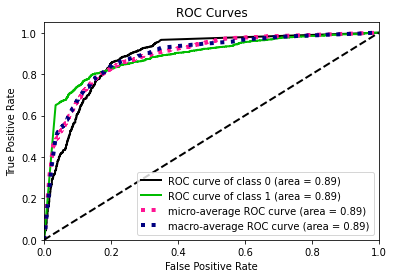

In [47]:
skplt.metrics.plot_roc_curve(y_test, prob) #plotting the ROC Curve
plt.show()